In [ ]:
!pip install eli5
!pip install rfpimp
!pip install treeinterpreter
!pip install ppscore
!pip install tikzplotlib

In [ ]:
import pandas as pd # used to manipulate data libraries
import tensorflow as tf # main ML framework
from sklearn.model_selection import train_test_split # sklearn framework for splititng datasets
from sklearn.metrics import *
from statistics import *
import matplotlib
from matplotlib import pyplot as plt 
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
import numpy as np
from sklearn.utils import shuffle
import seaborn as sns
import ppscore as pps
import pickle
# Import all Libraries

### **DATA ADDITION**

In [ ]:
url1 = "https://raw.githubusercontent.com/choprahetarth/FruitSpectroClassify/master/Data/dataset1.csv"
url2 = "https://github.com/choprahetarth/FruitSpectroClassify/blob/master/Data/dataset2.csv"
dataset1 = pd.read_csv(url1) 
dataset2 = pd.read_csv(url2)

# Load the two datasets

In [ ]:
dataset1

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,Label
0,413.93,257.93,546.50,165.48,341.55,520.31,692.89,719.72,279.17,155.36,178.55,68.19,1514.39,229.84,150.35,81.51,171.99,341.57,2
1,1153.94,408.69,759.07,338.32,1073.32,2065.71,530.54,673.10,370.16,206.84,539.66,169.00,4466.30,975.52,627.60,340.33,673.25,1431.08,2
2,489.10,207.98,412.93,140.66,356.23,644.56,120.60,217.23,176.74,119.51,263.79,86.97,1973.29,516.88,335.65,191.60,404.47,989.39,2
3,485.20,190.72,425.16,100.21,255.00,561.26,85.81,157.44,147.21,107.10,281.24,87.96,1583.22,422.24,324.29,174.79,387.18,885.74,2
4,1436.07,528.57,1056.31,398.07,1148.27,1986.64,619.83,655.54,312.99,129.62,234.26,93.89,2244.05,458.64,228.14,134.45,267.05,528.85,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,107.39,37.24,54.56,56.08,59.50,56.48,202.36,297.87,200.09,58.83,91.29,44.47,519.71,50.96,57.69,24.37,53.58,75.38,3
912,262.61,93.54,129.80,117.68,183.14,176.50,193.08,380.16,290.60,82.74,195.33,72.14,606.90,61.36,102.27,39.50,74.33,116.61,3
913,122.03,59.94,107.23,66.19,173.09,342.40,353.69,369.74,150.06,83.65,91.96,39.53,1103.67,249.60,103.14,67.23,146.06,358.06,2
914,355.36,128.96,197.53,139.74,278.18,389.00,362.97,523.34,316.33,116.29,183.92,75.11,1245.93,180.96,133.74,64.71,143.47,263.84,2


In [ ]:
dataset2

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,Label
0,1668.42,463.18,878.53,317.17,823.73,1628.71,286.43,295.68,133.87,125.02,465.16,135.39,2758.02,780.00,740.36,440.33,995.61,2289.73,1
1,1103.17,301.52,538.97,180.19,337.68,631.86,53.34,73.51,48.59,63.43,522.21,141.32,1784.00,478.40,674.80,394.96,1139.94,2601.86,1
2,1489.77,443.20,873.83,325.45,816.00,1592.00,324.12,332.43,148.16,145.25,504.76,147.25,2713.28,746.72,711.52,414.28,856.47,1948.15,1
3,892.30,286.08,560.60,239.95,694.68,1554.58,231.35,258.93,125.29,120.43,575.91,157.14,2754.58,650.00,749.10,438.65,1064.75,2374.53,2
4,1122.70,333.31,704.52,223.40,697.00,1485.39,126.40,168.96,104.81,85.03,388.64,107.72,2139.65,492.96,573.41,336.13,724.24,1611.29,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,329.00,100.81,220.10,70.79,140.64,144.02,31.89,44.43,51.45,54.24,484.62,127.49,1397.37,432.64,552.43,306.72,1063.02,2541.79,3
440,434.43,118.07,203.17,63.43,126.73,288.04,46.39,72.41,81.94,75.84,304.74,81.04,598.87,239.20,297.19,159.66,463.24,1093.04,3
441,907.92,219.78,447.73,103.89,255.77,589.50,23.77,35.66,38.11,41.37,207.41,64.24,1018.77,309.92,382.86,210.08,485.71,1121.31,3
442,555.49,151.67,336.74,69.87,187.77,377.00,24.93,37.85,46.21,45.96,245.00,73.13,583.96,165.36,284.96,150.42,378.54,864.54,3


In [ ]:
dataframe = pd.concat([dataset1,dataset2],axis=0).reset_index(drop=True)
print(dataframe.shape)

# conctenate the two datasets across axis=0 i.e. add rows not columns

(1360, 19)


In [ ]:
dataframe

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,Label
0,413.93,257.93,546.50,165.48,341.55,520.31,692.89,719.72,279.17,155.36,178.55,68.19,1514.39,229.84,150.35,81.51,171.99,341.57,2
1,1153.94,408.69,759.07,338.32,1073.32,2065.71,530.54,673.10,370.16,206.84,539.66,169.00,4466.30,975.52,627.60,340.33,673.25,1431.08,2
2,489.10,207.98,412.93,140.66,356.23,644.56,120.60,217.23,176.74,119.51,263.79,86.97,1973.29,516.88,335.65,191.60,404.47,989.39,2
3,485.20,190.72,425.16,100.21,255.00,561.26,85.81,157.44,147.21,107.10,281.24,87.96,1583.22,422.24,324.29,174.79,387.18,885.74,2
4,1436.07,528.57,1056.31,398.07,1148.27,1986.64,619.83,655.54,312.99,129.62,234.26,93.89,2244.05,458.64,228.14,134.45,267.05,528.85,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1355,329.00,100.81,220.10,70.79,140.64,144.02,31.89,44.43,51.45,54.24,484.62,127.49,1397.37,432.64,552.43,306.72,1063.02,2541.79,3
1356,434.43,118.07,203.17,63.43,126.73,288.04,46.39,72.41,81.94,75.84,304.74,81.04,598.87,239.20,297.19,159.66,463.24,1093.04,3
1357,907.92,219.78,447.73,103.89,255.77,589.50,23.77,35.66,38.11,41.37,207.41,64.24,1018.77,309.92,382.86,210.08,485.71,1121.31,3
1358,555.49,151.67,336.74,69.87,187.77,377.00,24.93,37.85,46.21,45.96,245.00,73.13,583.96,165.36,284.96,150.42,378.54,864.54,3


In [ ]:
dataframe['Label'].map(lambda x: int(x))
# change the datatype of all the values of the 'LABEL' column to int, just for easier calculations

0       2
1       2
2       2
3       2
4       2
       ..
1355    3
1356    3
1357    3
1358    3
1359    3
Name: Label, Length: 1360, dtype: int64

In [ ]:
dataframe.head()
# print out the heading values of the newly constructed dataframe

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,Label
0,413.93,257.93,546.50,165.48,341.55,520.31,692.89,719.72,279.17,155.36,178.55,68.19,1514.39,229.84,150.35,81.51,171.99,341.57,2
1,1153.94,408.69,759.07,338.32,1073.32,2065.71,530.54,673.10,370.16,206.84,539.66,169.00,4466.30,975.52,627.60,340.33,673.25,1431.08,2
2,489.10,207.98,412.93,140.66,356.23,644.56,120.60,217.23,176.74,119.51,263.79,86.97,1973.29,516.88,335.65,191.60,404.47,989.39,2
3,485.20,190.72,425.16,100.21,255.00,561.26,85.81,157.44,147.21,107.10,281.24,87.96,1583.22,422.24,324.29,174.79,387.18,885.74,2
4,1436.07,528.57,1056.31,398.07,1148.27,1986.64,619.83,655.54,312.99,129.62,234.26,93.89,2244.05,458.64,228.14,134.45,267.05,528.85,2


In [ ]:
dataframe.dtypes
# confirm the datatypes of all columns of the dataset

A        float64
B        float64
C        float64
D        float64
E        float64
F        float64
G        float64
H        float64
I        float64
J        float64
K        float64
L        float64
M        float64
N        float64
O        float64
P        float64
Q        float64
R        float64
Label      int64
dtype: object

In [ ]:
dataframe = shuffle(dataframe)
dataframeOriginal = dataframe.copy()
# Use this method to shuffle the dataframe

In [ ]:
target = dataframe.pop('Label')
# remove label from the dataframe and change it to X_train and y_train

In [ ]:
dataframe.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R
566,68.34,28.15,30.10,30.34,31.68,24.71,73.64,108.62,164.36,62.97,82.56,34.59,315.50,83.20,47.20,25.21,76.05,174.32
718,320.21,145.31,282.18,62.52,141.41,253.45,67.26,94.90,79.08,35.39,99.34,45.46,388.92,99.84,83.91,47.90,92.47,199.06
227,570.13,200.71,409.17,89.18,180.82,293.69,37.69,60.89,81.46,54.24,149.68,56.33,631.00,202.80,170.45,91.60,179.76,408.71
125,292.88,119.88,146.74,129.63,145.27,108.02,58.56,115.20,122.43,60.67,184.59,77.09,449.73,44.72,101.40,37.81,63.95,77.74
216,899.13,300.61,601.05,184.79,371.68,535.14,57.98,103.13,220.57,79.06,264.46,94.87,938.46,352.56,158.21,84.03,197.91,401.64


In [ ]:
target.head()

566    3
718    2
227    2
125    2
216    3
Name: Label, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataframe, target, test_size=0.2) 
print (X_train.shape, y_train.shape) 
print (X_test.shape, y_test.shape)
# split the datasets for testing, and print out their dimensions

(1088, 18) (1088,)
(272, 18) (272,)


In [ ]:
# save all the files using pickle 
X_train.to_pickle('X_train.pickle')
X_test.to_pickle('X_test.pickle')
y_train.to_pickle('y_train.pickle')
y_test.to_pickle('y_test.pickle')
dataframeOriginal.to_pickle('dataframeOriginal.pickle')
dataframe.to_pickle('dataframe.pickle')
target.to_pickle('target.pickle')

# **Plotting**

In [ ]:
plot_df = pd.read_csv("https://github.com/choprahetarth/FruitSpectroClassify/blob/master/PaperDocs/graphingData.csv")

In [ ]:
plot_df

,410,435,460,485,510,535,560,585,610,645,680,705,730,760,810,860,900,940,label
0,1103.17,301.52,538.97,180.19,337.68,631.86,53.34,73.51,48.59,63.43,522.21,141.32,1784.00,478.40,674.80,394.96,1139.94,2601.86,normala
1,591.61,294.26,666.89,261.09,877.82,1857.45,346.73,365.90,162.45,133.76,361.12,110.69,2643.30,614.64,537.57,314.28,636.09,1391.03,normalaa
2,411.98,156.21,240.80,91.01,150.68,161.67,61.46,113.01,139.11,71.70,175.86,63.25,407.28,157.04,149.47,87.39,185.81,363.95,normalaaa


In [ ]:
#map the labels according to the provided pre-requisits
labelMapping = {'normala':'A', 'normalaa':'B', 'normalaaa':'C'}
for label, newLabel in labelMapping.items():
  plot_df['label'] = plot_df['label'].replace(label,newLabel)
plot_df

,410,435,460,485,510,535,560,585,610,645,680,705,730,760,810,860,900,940,label
0,1103.17,301.52,538.97,180.19,337.68,631.86,53.34,73.51,48.59,63.43,522.21,141.32,1784.00,478.40,674.80,394.96,1139.94,2601.86,A
1,591.61,294.26,666.89,261.09,877.82,1857.45,346.73,365.90,162.45,133.76,361.12,110.69,2643.30,614.64,537.57,314.28,636.09,1391.03,B
2,411.98,156.21,240.80,91.01,150.68,161.67,61.46,113.01,139.11,71.70,175.86,63.25,407.28,157.04,149.47,87.39,185.81,363.95,C


In [ ]:
X = plot_df.drop(columns = ['label'])
Y = plot_df['label']
X

,410,435,460,485,510,535,560,585,610,645,680,705,730,760,810,860,900,940
0,1103.17,301.52,538.97,180.19,337.68,631.86,53.34,73.51,48.59,63.43,522.21,141.32,1784.00,478.40,674.80,394.96,1139.94,2601.86
1,591.61,294.26,666.89,261.09,877.82,1857.45,346.73,365.90,162.45,133.76,361.12,110.69,2643.30,614.64,537.57,314.28,636.09,1391.03
2,411.98,156.21,240.80,91.01,150.68,161.67,61.46,113.01,139.11,71.70,175.86,63.25,407.28,157.04,149.47,87.39,185.81,363.95


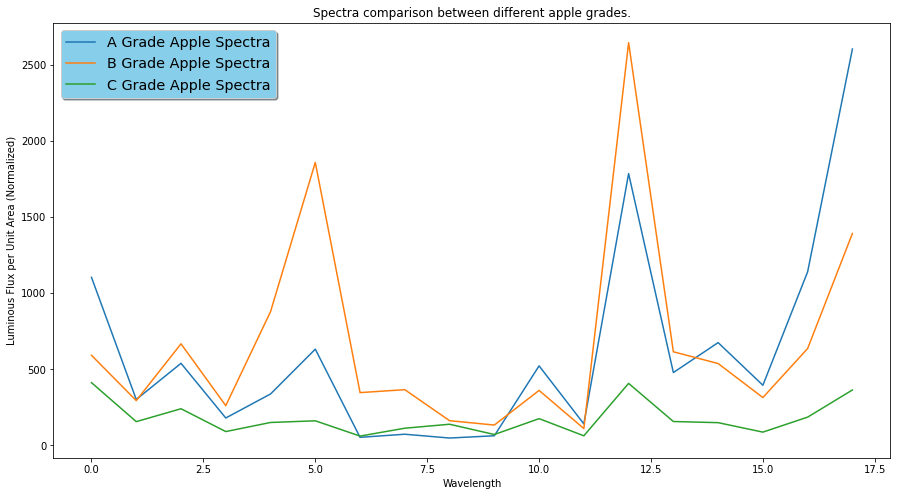

In [ ]:
fig, ax = plt.subplots()
plt.xlabel('Wavelength')
plt.ylabel('Luminous Flux per Unit Area (Normalized)')
plt.title('Spectra comparison between different apple grades.')
plt.plot(list(X.iloc[0]),label='A Grade Apple Spectra')
plt.plot(list(X.iloc[1]),label='B Grade Apple Spectra')
plt.plot(list(X.iloc[2]),label='C Grade Apple Spectra')
fig.set_size_inches(15, 8) 
legend = ax.legend(loc='best', shadow=True, fontsize='x-large')
legend.get_frame().set_facecolor('skyblue')
plt.show()
import tikzplotlib
#tikzplotlib.save("test.tex")

# **DATA PREP AND FEATURE EXTRACTION**

### **INITIAL EXPLORATORY DATA ANALYSIS**

In [ ]:
dataframeOriginal.shape

(1360, 19)

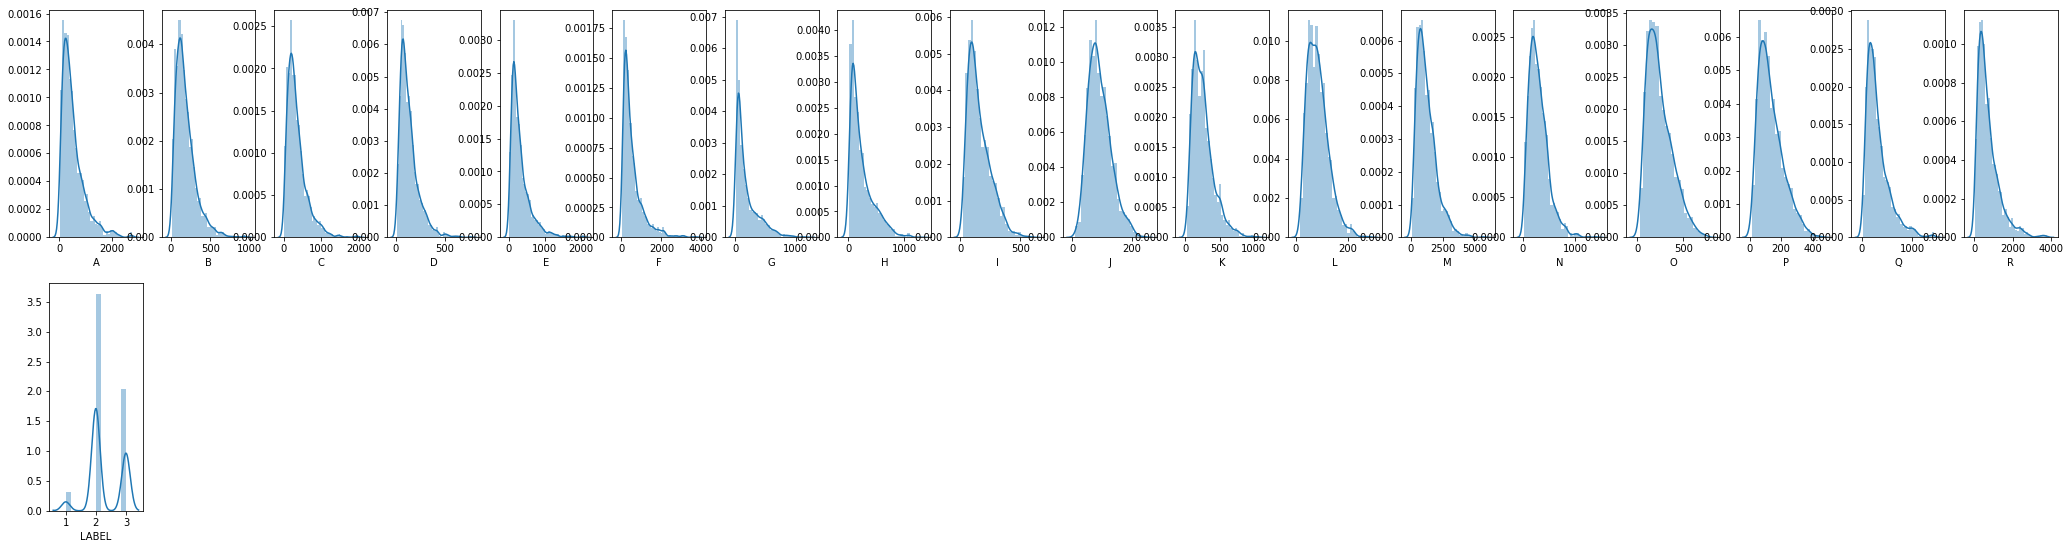

In [ ]:
l = dataframeOriginal.columns.values
number_of_columns=18
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(dataframeOriginal[l[i]],kde=True)

### **FEATURE IMPORTANCE STATISTICAL APROACHES**

In [ ]:
!sudo apt install texlive-fonts-recommended texlive-fonts-extra
!sudo apt-get install dvipng
!sudo apt-get install texlive-latex-extra texlive-fonts-recommended dvipng
!sudo apt-get -y install texlive-latex-recommended texlive-pictures texlive-latex-extra texlive-full

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-adf-accanthis fonts-adf-berenis fonts-adf-gillius
  fonts-adf-universalis fonts-cabin fonts-comfortaa fonts-croscore
  fonts-crosextra-caladea fonts-crosextra-carlito fonts-dejavu-core
  fonts-dejavu-extra fonts-droid-fallback fonts-ebgaramond
  fonts-ebgaramond-extra fonts-font-awesome fonts-freefont-otf
  fonts-freefont-ttf fonts-gfs-artemisia fonts-gfs-complutum fonts-gfs-didot
  fonts-gfs-neohellenic fonts-gfs-olga fonts-gfs-solomos fonts-go
  fonts-junicode fonts-lato fonts-linuxlibertine fonts-lmodern fonts-lobster
  fonts-lobstertwo fonts-noto-hinted fonts-noto-mono fonts-oflb-asana-math
  fonts-open-sans fonts-roboto-hinted fonts-sil-gentium
  fonts-sil-gentium-basic fonts-sil-gentiumpl

In [ ]:
from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
plt.rcParams["font.family"] = "Times New Roman"
rc('text', usetex=True)
matplotlib.use("pgf")
#matplotlib.rcParams.update({
#    "pgf.texsystem": "pdflatex",
#    'font.family': 'serif',
#    'text.usetex': True,
#    'pgf.rcfonts': False,
#})
#plt.rcParams["figure.figsize"] = (7,4)

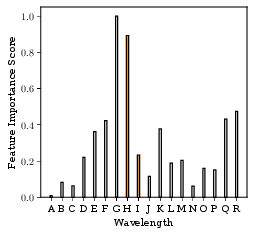

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# ANOVA METHOD FOR FEATURE SELECTION
X_indices = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R'] #indices
selector = SelectKBest(f_classif, k=4) 
selector.fit(dataframe, target)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()
plt.figure(figsize=(3.7,3.5))
plt.xlabel('Wavelength')
plt.ylabel('Feature Importance Score')
plt.bar(X_indices, scores, width=.2,
        label=r'Univariate score ($-Log(p_{value})$)', color='darkorange',
        edgecolor='black')
#fig = plt.figure()
#fig.set_size_inches(4, 5) 
#plt.set_size_inches(w=7.00137, h=3.5)
plt.savefig('bar1.pgf')
plt.show()
#import tikzplotlib
#tikzplotlib.save("anova.tex")
# ANOVA F-value between label/feature for classification tasks.

In [ ]:
scores

array([0.00979463, 0.08283302, 0.06370026, 0.21981779, 0.36209048,
       0.42327109, 1.        , 0.89265049, 0.23319707, 0.11608617,
       0.37764192, 0.18868452, 0.204252  , 0.0622312 , 0.15926762,
       0.15097757, 0.43109808, 0.47398811])

[0.01292439283235136, -0.06193033116209654, -0.0555507175996306, -0.15273447109756055, -0.2178191771004123, -0.23841183455287834, -0.42785321500029233, -0.3983241277803527, -0.16427481024053392, -0.09696464491991383, 0.22504905916493315, 0.1591255284414582, -0.15868167265463717, 0.07806782251944695, 0.16054538999325815, 0.1529635728960176, 0.24052608600355208, 0.25693593888760946]


<BarContainer object of 18 artists>

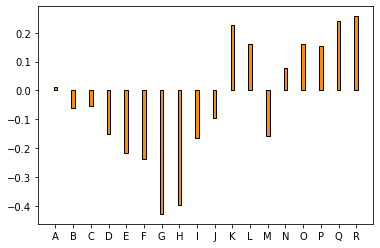

In [ ]:
from scipy.stats import kendalltau
X_indices = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R'] #indices
tauMatrix = []
p_valueMatrix = []
for a in X_indices:
  tau, p_value = kendalltau(X_train[a], y_train)
  tauMatrix.append(tau)
  p_valueMatrix.append(p_value)
print (tauMatrix)
plt.bar(X_indices, tauMatrix, width=.2,
        label=r'Univariate score', color='darkorange',
        edgecolor='black')
# KENDALL TAU FOR FEATURE APPROXIMATION

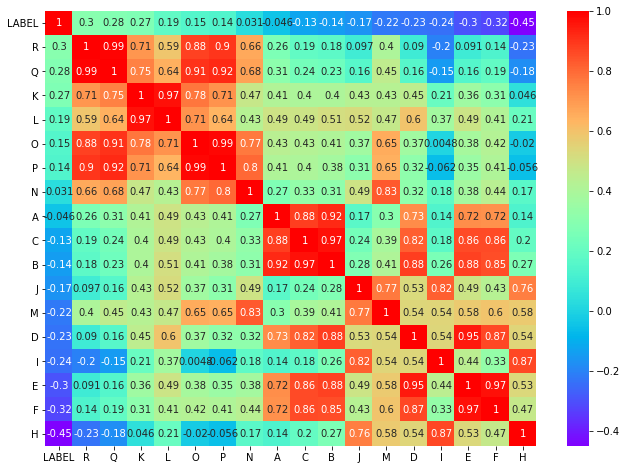

In [ ]:
k = 18 #number of variables for heatmap
cols = dataframeOriginal.corr().nlargest(k, 'LABEL')['LABEL'].index
cm = dataframeOriginal[cols].corr()
plt.figure(figsize=(11,8))
sns.heatmap(cm, annot=True, cmap = 'rainbow')

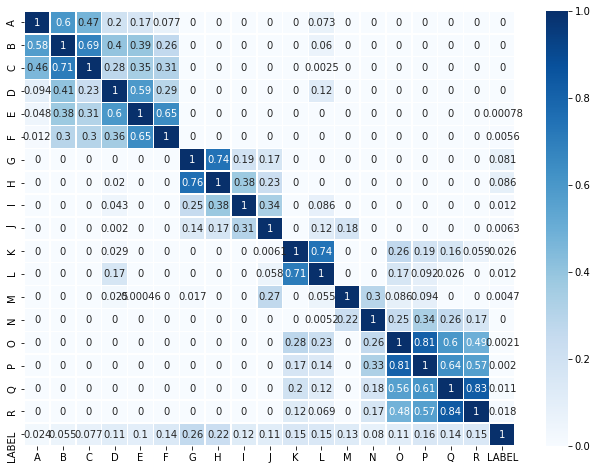

In [ ]:
ppsMatrix = pps.matrix(dataframeOriginal)
plt.figure(figsize=(11,8))
sns.heatmap(ppsMatrix, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

### **FEATURE IMPORTANCE NON STATISTICAL APPROACHES**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100,
                           n_jobs = -1,
                           oob_score = True,
                           bootstrap = True,
                           random_state = 42)
rf.fit(X_train, y_train)
rf.score(X_test,y_test)

0.4316932224192009

In [ ]:
from sklearn.metrics import r2_score
from rfpimp import permutation_importances

def r2(rf, X_train, y_train):
    return r2_score(y_train, rf.predict(X_train))

perm_imp_rfpimp = permutation_importances(rf, X_train, y_train, r2)
print(perm_imp_rfpimp)
# PERMUTATION IMPOTANCES

         Importance
Feature            
G          0.885284
K          0.148217
J          0.132039
I          0.117276
H          0.105187
F          0.082182
M          0.066399
N          0.064488
L          0.053846
E          0.045044
A          0.042026
Q          0.040140
D          0.039412
O          0.032674
C          0.029678
B          0.026607
P          0.026522
R          0.026212


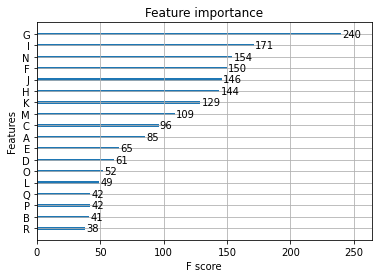

In [ ]:
# plot feature importance using built-in function
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
# plot feature importance
plot_importance(model)
pyplot.show()
# XGBOOST INBUILT FEATURE IMPORTANCE FUNCTIONS 

In [ ]:
from numpy import loadtxt
from numpy import sort
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
 
# define custom class to fix bug in xgboost 1.0.2
class MyXGBClassifier(XGBClassifier):
	@property
	def coef_(self):
		return None
 
# fit model on all training data
model = MyXGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data and evaluate
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# Fit model using each importance as a threshold
thresholds = sort(model.feature_importances_)
for thresh in thresholds:
	# select features using threshold
	selection = SelectFromModel(model, threshold=thresh, prefit=True)
	select_X_train = selection.transform(X_train)
	# train model
	selection_model = XGBClassifier()
	selection_model.fit(select_X_train, y_train)
	# eval model
	select_X_test = selection.transform(X_test)
	predictions = selection_model.predict(select_X_test)
	accuracy = accuracy_score(y_test, predictions)
	print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))
 
 # TRIAL OF XGBOOST USING MUTLIPLE MODELS

Accuracy: 77.94%
Thresh=0.031, n=18, Accuracy: 77.94%
Thresh=0.032, n=17, Accuracy: 76.84%
Thresh=0.033, n=16, Accuracy: 77.21%
Thresh=0.033, n=15, Accuracy: 77.57%
Thresh=0.034, n=14, Accuracy: 77.94%
Thresh=0.037, n=13, Accuracy: 78.31%
Thresh=0.044, n=12, Accuracy: 78.31%
Thresh=0.044, n=11, Accuracy: 77.94%
Thresh=0.044, n=10, Accuracy: 78.31%
Thresh=0.045, n=9, Accuracy: 77.21%
Thresh=0.048, n=8, Accuracy: 77.57%
Thresh=0.051, n=7, Accuracy: 77.21%
Thresh=0.051, n=6, Accuracy: 76.47%
Thresh=0.054, n=5, Accuracy: 75.74%
Thresh=0.063, n=4, Accuracy: 75.74%
Thresh=0.067, n=3, Accuracy: 76.84%
Thresh=0.101, n=2, Accuracy: 72.79%
Thresh=0.188, n=1, Accuracy: 69.85%


In [ ]:
from treeinterpreter import treeinterpreter as ti, utils

selected_rows = [31, 85]
selected_df = X_train.iloc[selected_rows,:].values
prediction, bias, contributions = ti.predict(rf, selected_df)

for i in range(len(selected_rows)):
    print("Row", selected_rows[i])
    print("Prediction:", prediction[i][0], 'Actual Value:', y_train[selected_rows[i]])
    print("Bias (trainset mean)", bias[i])
    print("Feature contributions:")
    for c, feature in sorted(zip(contributions[i], 
                                 X_train.columns), 
                             key=lambda x: -abs(x[0])):
        print(feature, round(c, 2))
    print("-"*20) 

Row 31
Prediction: 2.03 Actual Value: 2
Bias (trainset mean) 2.2870772058823534
Feature contributions:
G -0.34
F 0.08
E 0.03
J -0.01
I 0.01
R -0.01
M -0.01
H -0.01
N -0.01
K -0.01
A 0.0
L 0.0
B 0.0
P 0.0
D 0.0
Q 0.0
C -0.0
O -0.0
--------------------
Row 85
Prediction: 2.01 Actual Value: 3
Bias (trainset mean) 2.2870772058823534
Feature contributions:
G -0.34
L 0.02
H 0.01
I 0.01
J -0.01
N 0.01
Q 0.01
K -0.01
F -0.01
M 0.01
O 0.01
B 0.01
D -0.01
A 0.0
C -0.0
R 0.0
E -0.0
P -0.0
--------------------


### **FEATURE EXTRACTION AND PREDICTION USING RANDOM FOREST**

In [ ]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 1000))
sel.fit(X_train, y_train)
# select the random forest classifier and specify the estimator count and fit it across the train data

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=1000, n_jobs=None,
                                                 oob_score=False

In [ ]:
sel.get_support()
# find out the maximum likelihood features

array([False, False, False, False, False,  True,  True,  True, False,
        True,  True, False, False, False, False, False, False,  True])

In [ ]:
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)
# find out the maximum length of features which are right

6

In [ ]:
print(selected_feat)
# print out the maximum likelihood features

Index(['F', 'G', 'H', 'J', 'K', 'R'], dtype='object')


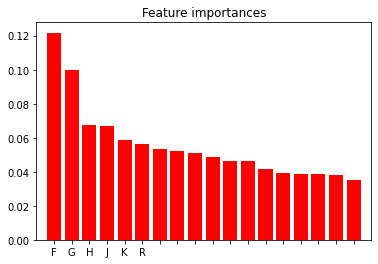

In [ ]:
importances = sel.estimator_.feature_importances_
indices = np.argsort(importances)[::-1]
# X is the train data used to fit the model 
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X_train.shape[1]), selected_feat)
plt.xlim([-1, X_train.shape[1]])
plt.show()

# PLOT

In [ ]:
X_important_train = sel.transform(X_train)
X_important_test = sel.transform(X_test)
# Transform the dataset to contain only important features 

In [ ]:
print(X_important_train.shape)
print(X_important_test.shape)

(1088, 6)
(272, 6)


In [ ]:
# Create a new random forest classifier for all features
clf = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)

# Train the new classifier on the new dataset containing all features
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
# Create a new random forest classifier for the most important features
clf_important = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)

# Train the new classifier on the new dataset containing the most important features
clf_important.fit(X_important_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
# Apply The Full Featured Classifier To The Test Data
y_pred = clf.predict(X_test)

# View The Accuracy Of Our Full Feature Model
y_score = accuracy_score(y_test, y_pred)
print("Accuracy Score: ", y_score)
print("F1 Score: ",f1_score(y_test, y_pred, average='macro'))
print("Confusion Matrix : ")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score:  0.7794117647058824
F1 Score:  0.5183611373413074
Confusion Matrix : 
[[  0   9   1]
 [  1 147  23]
 [  0  26  65]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        10
           2       0.81      0.86      0.83       171
           3       0.73      0.71      0.72        91

    accuracy                           0.78       272
   macro avg       0.51      0.52      0.52       272
weighted avg       0.75      0.78      0.77       272



In [ ]:
# Apply The Full Featured Classifier To The Test Data
y_important_pred = clf_important.predict(X_important_test)

# View The Accuracy Of Our Limited Feature (2 Features) Model
print("Accuracy Score: ", accuracy_score(y_test, y_important_pred))
print("F1 Score: ",f1_score(y_test, y_important_pred, average='macro'))
print("Confusion Matrix : ")
print(confusion_matrix(y_test, y_important_pred))
print(classification_report(y_test, y_important_pred))
#precision_recall_curve(y_true, …) # check this?

Accuracy Score:  0.7867647058823529
F1 Score:  0.5245294532293868
Confusion Matrix : 
[[  0  10   0]
 [  1 148  22]
 [  0  25  66]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        10
           2       0.81      0.87      0.84       171
           3       0.75      0.73      0.74        91

    accuracy                           0.79       272
   macro avg       0.52      0.53      0.52       272
weighted avg       0.76      0.79      0.77       272



### **DATA PRE-PROCESSING for non Tree Models** 

In [ ]:
robust_X_train = X_train.copy()
robust_X_test = X_test.copy()

In [ ]:
# Robust Scalar is important here because our data has a lot of outliers
transformer = RobustScaler().fit(X_train)
robust1 = transformer.transform(X_train)
transformer = RobustScaler().fit(X_test)
robust2 = transformer.transform(X_test)

In [ ]:
robust_X_train[:] = robust1 # replace the previous pandas df values with new values from np array
robust_X_test[:] = robust2 # replace the previous pandas df values with new values from np array

In [ ]:
####### I DONT THINK SO THAT NORMALIZATION IS NEEDED AS FEATURE SCALING IS ALREADY DONE

#***MODEL TRAINING AND TESTING ALL VARIABLES***

In [ ]:
import os 
os.chdir('/content/drive/My Drive/Colab Notebooks/Capstone')
os.getcwd()

'/content/drive/My Drive/Colab Notebooks/Capstone'

In [ ]:
'''Models required for training - 
1 - Random Forest
2 - Decision Tree
3 - RRF
4 - ELM
5 - SVM
6 - Neural Network
7 - AvNNet'''

'Models required for training - \n1 - Random Forest\n2 - Decision Tree\n3 - RRF\n4 - ELM\n5 - SVM\n6 - Neural Network\n7 - AvNNet'

## P VALUE TEST

In [ ]:
class01 = dataframeOriginal[dataframeOriginal['LABEL']==1]
class02 = dataframeOriginal[dataframeOriginal['LABEL']==2]
class03 = dataframeOriginal[dataframeOriginal['LABEL']==3]
mean1,mean2,mean3 = class01.mean().mean(),class02.mean().mean(),class03.mean().mean() # means
std1,std2,std3 = class01.std().std(),class02.std().std(),class03.std().std() # standard deviation
n1,n2,n3 = len(class01),len(class02),len(class03) # total samples
se1,se2,se3 = std1/(n1**(0.5)), std2/(n2**(0.5)), std3/(n3**(0.5)) # standard error
means = [mean1,mean2,mean3]
stdDevs = [std1,std2,std3]
stdErrs= [se1,se2,se3]
print(means)
print(stdDevs)
print(stdErrs)

[413.4786915204678, 318.96346448645886, 297.8401837568058]
[237.64549184457283, 200.78612632501031, 189.06739501527454]
[28.006789800284974, 6.994716151118098, 8.777233463903915]


In [ ]:
from scipy.stats import ttest_ind, ttest_ind_from_stats
stat, p = ttest_ind(class01, class02)
count = 0
for i in p:
  if i < 0.05:
    #print (count)
    print (i)
  count+=1

0.00406092984372848
3.475007663499373e-05
3.981732000892859e-07
3.1614059336549076e-14
6.402659030900419e-09
0.04815083003577285
0.0005036155906022308
3.5182665035908427e-06
0.0003783674581794422
0.028474238027864533
0.011228406047405354
0.0


In [ ]:
stat, p = ttest_ind(class02, class03)
count = 0
for i in p:
  if i < 0.05:
    print (count)
    print (i)
    count+=1 

1
3.5517056059270493e-06
2
7.062910417311815e-05
3
3.4364978449519795e-14
4
5.963949754749211e-21
5
2.200590425249659e-22
6
3.4086260719975517e-56
7
6.144144490314492e-56
8
2.688646171298049e-17
9
7.73847064128846e-06
10
1.9053660749698684e-29
11
6.485127814901199e-16
12
1.3428488549371609e-09
13
0.0005187086188989493
14
1.0297576376237212e-13
15
6.966433982472168e-13
16
8.255134390545792e-34
17
1.0078130805520238e-36
18
0.0


In [ ]:
stat, p = ttest_ind(class01, class03)
count = 0
for i in p:
  if i < 0.05:
    print (count)
    print (i)
  count+=1

1
1.4675728461132645e-06
2
1.8350999151308455e-05
3
1.3593501126060395e-16
4
1.1195153091428534e-32
5
2.2781218581450216e-41
6
5.880316563378925e-76
7
9.20195596995963e-58
8
7.602222985622949e-11
9
2.2112852282041218e-10
10
2.9154543610228256e-05
11
0.010877674800513546
12
1.1276372544947225e-14
13
0.04211626572631381
16
0.00014529534168382366
17
3.440095454234554e-05
18
0.0


In [ ]:
from scipy.stats import t
# comparsion between class 1 and class 2
sed = (se1**2.0 + se2**2.0)
sed = sed**(0.5)
t_stat = (mean1 - mean2) / sed
dof = n1 + n2 - 2
alpha = 0.05
cv = t.ppf(1.0 - alpha, dof)
p = (1 - t.cdf(abs(t_stat), dof)) * 2
p

0.001100480071468679

## RANDOM FOREST

In [ ]:
#Load all the data
# save all the files using pickle 
X_train = pd.read_pickle('X_train.pickle')
X_test = pd.read_pickle('X_test.pickle')
y_train = pd.read_pickle('y_train.pickle')
y_test = pd.read_pickle('y_test.pickle')
dataframeOriginal = pd.read_pickle('dataframeOriginal.pickle')
dataframe = pd.read_pickle('dataframe.pickle')
target = pd.read_pickle('target.pickle')
# all the data was presented as serialized pickle files

In [ ]:
y_fulll = pd.concat([y_test,y_train],axis=0).reset_index(drop=True)
print(y_fulll.value_counts())

2    824
3    464
1     72
Name: LABEL, dtype: int64


### TRAINING

In [ ]:
y_train = pd.get_dummies(y_train)
#y_test = pd.get_dummies(y_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# Random Forest

# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model 
rf = RandomForestClassifier(n_estimators= 10, random_state=42)
# Train the model on training data
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy:', round(accuracy, 2), '%.')
# THIS IS THE BASELINE MODEL

Accuracy: 0.71 %.


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 42)

from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


n_estimators = number of trees in the foreset

max_features = max number of features considered for splitting a node

max_depth = max number of levels in each decision tree

min_samples_split = min number of data points placed in a node before the node is split

min_samples_leaf = min number of data points allowed in a leaf node

bootstrap = method for sampling data points (with or without replacement)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier(random_state = 42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_train, y_train);

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 17.1min finished


In [ ]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 1600}

{'bootstrap': True,
 'max_depth': 70,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 400}

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    accuracy = accuracy_score(test_labels,predictions)
    print('Model Performance')
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    return accuracy

base_model = RandomForestClassifier(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Accuracy = 0.71%.


In [ ]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

Model Performance
Accuracy = 0.76%.


In [ ]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 6.74%.


In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [40,60,80,90,100,120],
    'min_samples_leaf': [3,4,5],
    'min_samples_split': [2,3,4,5],
    'n_estimators': [200,400,600,800,1000,1200]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 18.3min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed: 28.6min
[Parallel(n_jobs=-1)]: Done 1296 out of 1296 | elapsed: 36.7min finished


{'bootstrap': True,
 'max_depth': 40,
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'n_estimators': 200}

In [ ]:
 best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)

Model Performance
Accuracy = 0.78%.


In [ ]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Improvement of 9.33%.


In [ ]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [180,200],
    'max_features': [3, 4],
    'min_samples_leaf': [8,9,10],
    'min_samples_split': [7,8,10],
    'n_estimators': [50,80, 100, 120,180]
}

# Create a base model
rf = RandomForestClassifier(random_state = 42)

# Instantiate the grid search model
grid_search_second = GridSearchCV(estimator = rf, param_grid = param_grid, 
                                 cv = 3, n_jobs = -1, verbose = 2, return_train_score=True)

grid_search_second.fit(X_train, y_train)
grid_search_second.best_params_

Fitting 3 folds for each of 180 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   38.5s
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  2.3min finished


{'bootstrap': True,
 'max_depth': 180,
 'max_features': 4,
 'min_samples_leaf': 9,
 'min_samples_split': 7,
 'n_estimators': 100}

In [ ]:
best_grid_second = grid_search_second.best_estimator_
grid_accuracy_second = evaluate(best_grid_second, X_test, y_test)

Model Performance
Accuracy = 0.77%.


In [ ]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy_second - base_accuracy) / base_accuracy))

Improvement of 8.29%.


In [ ]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [300,400,800],
    'max_features': [8,9,10],
    'min_samples_leaf': [ 2,3,4],
    'min_samples_split': [7,8,9,10],
    'n_estimators': [1000,1500,2000]
}

# Create a base model
rf = RandomForestClassifier(random_state = 42)

# Instantiate the grid search model
grid_search_third = GridSearchCV(estimator = rf, param_grid = param_grid, 
                                 cv = 3, n_jobs = -1, verbose = 2, return_train_score=True)

grid_search_third.fit(X_train, y_train)
grid_search_third.best_params_

Fitting 3 folds for each of 324 candidates, totalling 972 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 15.2min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 36.2min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 64.9min
[Parallel(n_jobs=-1)]: Done 972 out of 972 | elapsed: 98.0min finished


{'bootstrap': True,
 'max_depth': 300,
 'max_features': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 7,
 'n_estimators': 2000}

In [ ]:
best_grid_third = grid_search_third.best_estimator_
grid_accuracy_third = evaluate(best_grid_third, X_test, y_test)

Model Performance
Accuracy = 0.75%.


In [ ]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy_third - base_accuracy) / base_accuracy))

Improvement of 6.22%.


In [ ]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [150,160,180,220],
    'max_features': [11,12,15],
    'min_samples_leaf': [15,18,20],
    'min_samples_split': [10,15],
    'n_estimators': [50,100,150,200,250,300]
}

# Create a base model
rf = RandomForestClassifier(random_state = 42)

# Instantiate the grid search model
grid_search_fourth = GridSearchCV(estimator = rf, param_grid = param_grid, 
                                 cv = 3, n_jobs = -1, verbose = 2, return_train_score=True)

grid_search_fourth.fit(X_train, y_train)
grid_search_fourth.best_params_

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   21.7s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 1296 out of 1296 | elapsed: 13.6min finished


{'bootstrap': True,
 'max_depth': 150,
 'max_features': 15,
 'min_samples_leaf': 18,
 'min_samples_split': 10,
 'n_estimators': 250}

In [ ]:
best_grid_fourth = grid_search_fourth.best_estimator_
grid_accuracy_fourth = evaluate(best_grid_fourth, X_test, y_test)

Model Performance
Accuracy = 0.76%.


In [ ]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy_fourth - base_accuracy) / base_accuracy))

Improvement of 7.25%.


In [ ]:
import joblib
filename = 'best_random_FOREST.sav'
joblib.dump(best_random, filename)
filename = 'best_grid_FOREST.sav'
joblib.dump(best_grid, filename)
filename = 'best_grid_second_FOREST.sav'
joblib.dump(best_grid_second, filename)
filename = 'best_grid_third_FOREST.sav'
joblib.dump(best_grid_third, filename)
filename = 'best_grid_fourth_FOREST.sav'
joblib.dump(best_grid_fourth, filename)
# save all the files for later view and analysis

['best_grid_fourth_FOREST.sav']

### Evaluation

In [ ]:
import joblib
best_random_FOREST_model = joblib.load('best_random_FOREST.sav')
best_grid_FOREST_model = joblib.load('best_grid_FOREST.sav')
best_grid_second_FOREST_model = joblib.load('best_grid_second_FOREST.sav')
best_grid_third_FOREST_model = joblib.load('best_grid_third_FOREST.sav')
best_grid_fourth_FOREST_model = joblib.load('best_grid_fourth_FOREST.sav')
result_random_best = best_random_FOREST_model.fit(X_train,y_train)
result_grid_best1 = best_grid_FOREST_model.fit(X_train,y_train)
result_grid_best2 = best_grid_second_FOREST_model.fit(X_train,y_train)
result_grid_best3 = best_grid_third_FOREST_model.fit(X_train,y_train)
result_grid_best4 = best_grid_fourth_FOREST_model.fit(X_train,y_train)
### MODEL PREDICTIONS ###
y_pred_random_best = result_random_best.predict(X_test)
y_pred_grid_best1 = result_grid_best1.predict(X_test)
y_pred_grid_best2 = result_grid_best2.predict(X_test)
y_pred_grid_best3 = result_grid_best3.predict(X_test)
y_pred_grid_best4 = result_grid_best4.predict(X_test)
#########################

In [ ]:
#print(y_test.value_counts())
unique_elements, counts_elements = np.unique(y_pred_random_best, return_counts=True)
print("Frequency of unique values of y_pred_random_best array:")
print(np.asarray((unique_elements, counts_elements)))
unique_elements, counts_elements = np.unique(y_pred_grid_best1, return_counts=True)
print("Frequency of unique values of y_pred_grid_best1 array:")
print(np.asarray((unique_elements, counts_elements)))
unique_elements, counts_elements = np.unique(y_pred_grid_best2, return_counts=True)
print("Frequency of unique values of y_pred_grid_best2 array:")
print(np.asarray((unique_elements, counts_elements)))
unique_elements, counts_elements = np.unique(y_pred_grid_best3, return_counts=True)
print("Frequency of unique values of y_pred_grid_best3 array:")
print(np.asarray((unique_elements, counts_elements)))
unique_elements, counts_elements = np.unique(y_pred_grid_best4, return_counts=True)
print("Frequency of unique values of y_pred_grid_best4 array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of y_pred_random_best array:
[[  1   2   3]
 [  2 190  80]]
Frequency of unique values of y_pred_grid_best1 array:
[[  2   3]
 [189  83]]
Frequency of unique values of y_pred_grid_best2 array:
[[  2   3]
 [192  80]]
Frequency of unique values of y_pred_grid_best3 array:
[[  1   2   3]
 [  3 187  82]]
Frequency of unique values of y_pred_grid_best4 array:
[[  2   3]
 [189  83]]


In [ ]:
from sklearn.metrics import mean_squared_error
A = mean_squared_error(y_test, y_pred_random_best)
B = mean_squared_error(y_test, y_pred_grid_best1)
C = mean_squared_error(y_test, y_pred_grid_best2)
D = mean_squared_error(y_test, y_pred_grid_best3)
E = mean_squared_error(y_test, y_pred_grid_best4)
allModelAccuracies = [A,B,C,D,E]
allModelNames = ["Random Best", "Grid Search 1", "Grid Search 2", "Grid Search 3", "Grid Search 4"]
zipObjAccuracy = zip(allModelNames, allModelAccuracies)
# Create a dictionary from zip object
RFRMSValue = dict(zipObjAccuracy)
#############################################

In [ ]:
from sklearn.metrics import accuracy_score
############### ACCURACY SCORES #############
A = accuracy_score(y_test, y_pred_random_best)
B = accuracy_score(y_test, y_pred_grid_best1)
C = accuracy_score(y_test, y_pred_grid_best2)
D = accuracy_score(y_test, y_pred_grid_best3)
E = accuracy_score(y_test, y_pred_grid_best4)
allModelAccuracies = [A,B,C,D,E]
allModelNames = ["Random Best", "Grid Search 1", "Grid Search 2", "Grid Search 3", "Grid Search 4"]
zipObjAccuracy = zip(allModelNames, allModelAccuracies)
# Create a dictionary from zip object
RFAccuracies = dict(zipObjAccuracy)
#############################################

In [ ]:
from sklearn.metrics import f1_score
############## f1 score #######################
A = f1_score(y_test, y_pred_random_best, average='macro')
B = f1_score(y_test, y_pred_grid_best1, average='macro')
C = f1_score(y_test, y_pred_grid_best2, average='macro')
D = f1_score(y_test, y_pred_grid_best3, average='macro')
E = f1_score(y_test, y_pred_grid_best4, average='macro')
allModelAccuracies = [A,B,C,D,E]
allModelNames = ["Random Best", "Grid Search 1", "Grid Search 2", "Grid Search 3", "Grid Search 4"]
zipObjAccuracy = zip(allModelNames, allModelAccuracies)
# Create a dictionary from zip object
RFF1Score = dict(zipObjAccuracy)

In [ ]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [ ]:
from sklearn import preprocessing
############## AUC score #######################
A = multiclass_roc_auc_score(y_test, y_pred_random_best, average="macro")
B = multiclass_roc_auc_score(y_test, y_pred_grid_best1, average="macro")
C = multiclass_roc_auc_score(y_test, y_pred_grid_best2, average="macro")
D = multiclass_roc_auc_score(y_test, y_pred_grid_best3, average="macro")
E = multiclass_roc_auc_score(y_test, y_pred_grid_best4, average="macro")
allModelAccuracies = [A,B,C,D,E]
allModelNames = ["Random Best", "Grid Search 1", "Grid Search 2", "Grid Search 3", "Grid Search 4"]
zipObjAccuracy = zip(allModelNames, allModelAccuracies)
# Create a dictionary from zip object
RFAUCScore = dict(zipObjAccuracy)

In [ ]:
############## Gini score #######################
RFGiniScore = {k: (2*(v)-1) for k, v in RFAUCScore.items()}

In [ ]:
print(RFAccuracies)
print(RFF1Score)
print(RFAUCScore)
print(RFGiniScore)
print(RFRMSValue)

# Thus we select the grid search 2 model 

{'Random Best': 0.7720588235294118, 'Grid Search 1': 0.7757352941176471, 'Grid Search 2': 0.7794117647058824, 'Grid Search 3': 0.7683823529411765, 'Grid Search 4': 0.7683823529411765}
{'Random Best': 0.5574948191312554, 'Grid Search 1': 0.510860882220982, 'Grid Search 2': 0.5124081136351074, 'Grid Search 3': 0.5537211646800687, 'Grid Search 4': 0.5050282875370692}
{'Random Best': 0.6834543136670538, 'Grid Search 1': 0.6738486478068761, 'Grid Search 2': 0.673703893639337, 'Grid Search 3': 0.6838423324456735, 'Grid Search 4': 0.6682494022297895}
{'Random Best': 0.36690862733410756, 'Grid Search 1': 0.3476972956137523, 'Grid Search 2': 0.34740778727867405, 'Grid Search 3': 0.367684664891347, 'Grid Search 4': 0.3364988044595789}
{'Random Best': 0.22794117647058823, 'Grid Search 1': 0.22426470588235295, 'Grid Search 2': 0.22058823529411764, 'Grid Search 3': 0.23161764705882354, 'Grid Search 4': 0.23161764705882354}
{'Random Best': 0.17268445839874402, 'Grid Search 1': 0.18602825745682883, '

In [ ]:
from sklearn.metrics import classification_report
############### Classification Report #########
print(classification_report(y_test, y_pred_grid_best2, labels=[1, 2, 3]))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        11
           2       0.81      0.87      0.84       178
           3       0.71      0.69      0.70        83

    accuracy                           0.78       272
   macro avg       0.51      0.52      0.51       272
weighted avg       0.75      0.78      0.76       272



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
############## Confusion Matrices #######################
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_grid_best2).transpose()
confusion_matrix

array([[  0,   0,   0],
       [ 11, 155,  26],
       [  0,  23,  57]])

In [ ]:
'''Sensitivity of each class can be calculated from its TP/(TP+FN) and
specificity of each class can be calculated from its TN/(TN+FP)
Suppose there are three classes: C1, C2, and C3
"TP of C1" is all C1 instances that are classified as C1.
"TN of C1" is all non-C1 instances that are not classified as C1.
"FP of C1" is all non-C1 instances that are classified as C1.
"FN of C1" is all C1 instances that are not classified as C1.'''
########### Specificity and Sensitivity ################
FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)  
FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
TP = np.diag(confusion_matrix)
TN = confusion_matrix.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide


In [ ]:
TPR

array([       nan, 0.80729167, 0.7125    ])

In [ ]:
TNR

array([0.95955882, 0.7125    , 0.86458333])

In [ ]:
ACC

array([0.95955882, 0.77941176, 0.81985294])

In [ ]:
y_ref = [25.38,10.90,36.68,6.44,12.36,14.83,10.44,13.17,15.72,17.47,36.92,16.80,59.66,97.76,29.72,24.37,66.55,133.10]

In [ ]:
y_ref_pd = pd.DataFrame(y_ref, index =['a', 'b', 'c', 'd', 'e', 'f', 'g','h','i','j,','k','l','m','n','o','p','q','r']).transpose()

In [ ]:
y_ref_pd

,a,b,c,d,e,f,g,h,i,"j,",k,l,m,n,o,p,q,r
0,25.38,10.9,36.68,6.44,12.36,14.83,10.44,13.17,15.72,17.47,36.92,16.8,59.66,97.76,29.72,24.37,66.55,133.1


In [ ]:
result_grid_best3.predict(y_ref_pd)

array([3])

## SUPPORT VECTOR MACHINES


### Data Preperation

In [ ]:
#Load all the data
# save all the files using pickle 
X_train = pd.read_pickle('X_train.pickle')
X_test = pd.read_pickle('X_test.pickle')
y_train = pd.read_pickle('y_train.pickle')
y_test = pd.read_pickle('y_test.pickle')
dataframeOriginal = pd.read_pickle('dataframeOriginal.pickle')
dataframe = pd.read_pickle('dataframe.pickle')
target = pd.read_pickle('target.pickle')
# all the data was presented as serialized pickle files

In [ ]:
y_fulll = pd.concat([y_test,y_train],axis=0).reset_index(drop=True)
print(y_fulll.value_counts())

2    824
3    464
1     72
Name: LABEL, dtype: int64


In [ ]:
# CHECK DATA
y_train

1328    3
1293    3
364     2
703     3
924     2
       ..
1081    3
685     1
557     2
512     3
531     3
Name: LABEL, Length: 1088, dtype: int64

### BASE MODEL DEFINITION

In [ ]:
from sklearn.preprocessing import RobustScaler
scaling = RobustScaler().fit(X_train)
X_train = scaling.transform(X_train)
X_test = scaling.transform(X_test)

In [ ]:
from sklearn.svm import SVC 
from sklearn.metrics import confusion_matrix 
svm_model_baseline = SVC(kernel = 'linear', C = 1,decision_function_shape='ovo')

svm_model_baseline.fit(X_train, y_train) 
svm_predictions_baseline = svm_model_baseline.predict(X_test) 
  
# model accuracy for X_test   
accuracy = svm_model_baseline.score(X_test, y_test) 

In [ ]:
accuracy

0.7794117647058824

In [ ]:
kernels = ['Polynomial', 'RBF', 'Sigmoid','Linear']
#A function which returns the corresponding SVC model
def getClassifier(ktype):
    if ktype == 0:
        # Polynomial kernal
        return SVC(kernel='poly', degree=8, gamma="auto",decision_function_shape='ovo')
    elif ktype == 1:
        # Radial Basis Function kernal
        return SVC(kernel='rbf', gamma="auto",decision_function_shape='ovo')
    elif ktype == 2:
        # Sigmoid kernal
        return SVC(kernel='sigmoid', gamma="auto",decision_function_shape='ovo')
    elif ktype == 3:
        # Linear kernal
        return SVC(kernel='linear', gamma="auto",decision_function_shape='ovo')

In [ ]:
for i in range(4):
# Train a SVC model using different kernal
    svclassifier = getClassifier(i) 
    svclassifier.fit(X_train, y_train)
# Make prediction
    y_pred = svclassifier.predict(X_test)
# Evaluate our model
    print("Evaluation:", kernels[i], "kernel")
    print(classification_report(y_test,y_pred))

Evaluation: Polynomial kernel
              precision    recall  f1-score   support

           1       0.12      0.09      0.11        11
           2       0.67      0.93      0.78       178
           3       0.72      0.16      0.26        83

    accuracy                           0.66       272
   macro avg       0.51      0.39      0.38       272
weighted avg       0.67      0.66      0.60       272

Evaluation: RBF kernel
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        11
           2       0.80      0.89      0.84       178
           3       0.74      0.64      0.68        83

    accuracy                           0.78       272
   macro avg       0.51      0.51      0.51       272
weighted avg       0.74      0.78      0.76       272

Evaluation: Sigmoid kernel
              precision    recall  f1-score   support

           1       0.25      0.09      0.13        11
           2       0.74      0.72      0.73      

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### MODEL SEARCHING

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
model = SVC()
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(model.get_params())

Parameters currently in use:

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
random_grid = {'C': [0.1,1, 10, 100, 500], 
              'gamma': [10,1,0.1,0.01,'auto'],
              'kernel': ['rbf', 'poly', 'sigmoid','linear'],
              'degree': [3,4,6,8],
              'decision_function_shape':['ovo','ovr'],
              }
svmRandom = RandomizedSearchCV(estimator=model, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)
svmRandom.fit(X_train,y_train)
svmRandom.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 14.5min finished


{'C': 1,
 'decision_function_shape': 'ovo',
 'degree': 6,
 'gamma': 0.01,
 'kernel': 'linear'}

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    accuracy = accuracy_score(test_labels,predictions)
    print('Model Performance')
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    return accuracy

In [ ]:
best_random = svmRandom.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

Model Performance
Accuracy = 0.78%.


In [ ]:
param_grid = {'C': [1,2,3,5], 
              'gamma': [0.01,0.001,0.0001],
              'kernel': ['linear','rbf'],
              'degree': [5,6,7,8],
              'decision_function_shape':['ovo'],
              }
svmGrid1 = GridSearchCV(estimator = model, param_grid = param_grid, 
                              cv = 3, n_jobs = -1, verbose = 2, return_train_score=True)
svmGrid1.fit(X_train,y_train)
svmGrid1.best_params_

Fitting 3 folds for each of 96 candidates, totalling 288 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 288 out of 288 | elapsed:   13.4s finished


{'C': 1,
 'decision_function_shape': 'ovo',
 'degree': 5,
 'gamma': 0.01,
 'kernel': 'linear'}

In [ ]:
grid1 = svmGrid1.best_estimator_
grid1_accuracy = evaluate(grid1, X_test, y_test)

Model Performance
Accuracy = 0.78%.


In [ ]:
param_grid = {'C': [0.01,0.1,0.5,0.9,1,1.1,1.2,1.5], 
              'gamma': [0.01,0.02,0.03,0.05,0.001],
              'kernel': ['rbf'],
              'degree': [5,6,7,8,9,10],
              'decision_function_shape':['ovo','ovr'],
              }
svmGrid2 = GridSearchCV(estimator = model, param_grid = param_grid, 
                              cv = 3, n_jobs = -1, verbose = 2, return_train_score=True)
svmGrid2.fit(X_train,y_train)
svmGrid2.best_params_

Fitting 3 folds for each of 480 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done 718 tasks      | elapsed:   30.1s
[Parallel(n_jobs=-1)]: Done 1284 tasks      | elapsed:   52.6s
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:   58.8s finished


{'C': 1.5,
 'decision_function_shape': 'ovo',
 'degree': 5,
 'gamma': 0.05,
 'kernel': 'rbf'}

In [ ]:
grid2 = svmGrid2.best_estimator_
grid2_accuracy = evaluate(grid2, X_test, y_test)

Model Performance
Accuracy = 0.79%.


In [ ]:
param_grid = {'C': [0.01,0.1,0.5,0.9,1,1.1,1.2,1.5], 
              'gamma': [0.04,0.045,0.05,0.055,0.06],
              'kernel': ['rbf'],
              'degree': [3,4,5,6,7,8],
              'decision_function_shape':['ovo'],
              }
svmGrid3 = GridSearchCV(estimator = model, param_grid = param_grid, 
                              cv = 3, n_jobs = -1, verbose = 2, return_train_score=True)
svmGrid3.fit(X_train,y_train)
svmGrid3.best_params_

Fitting 3 folds for each of 240 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:   28.5s finished


{'C': 1.5,
 'decision_function_shape': 'ovo',
 'degree': 3,
 'gamma': 0.05,
 'kernel': 'rbf'}

In [ ]:
grid3 = svmGrid3.best_estimator_
grid3_accuracy = evaluate(grid3, X_test, y_test)

Model Performance
Accuracy = 0.79%.


In [ ]:
param_grid = {'C': [1.5,1.6,1.7,1.8,1.9,2.0], 
              'gamma': [0.01,0.02,0.03,0.04,0.05,0.06],
              'kernel': ['rbf','linear'],
              'degree': [3,5,8],
              'decision_function_shape':['ovo'],
              }
svmGrid4 = GridSearchCV(estimator = model, param_grid = param_grid, 
                              cv = 3, n_jobs = -1, verbose = 2, return_train_score=True)
svmGrid4.fit(X_train,y_train)
svmGrid4.best_params_

Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 648 out of 648 | elapsed:   24.6s finished


{'C': 1.5,
 'decision_function_shape': 'ovo',
 'degree': 3,
 'gamma': 0.01,
 'kernel': 'linear'}

In [ ]:
grid4 = svmGrid4.best_estimator_
grid4_accuracy = evaluate(grid4, X_test, y_test)

Model Performance
Accuracy = 0.78%.


In [ ]:
import joblib
filename = 'best_random_SVM.sav'
joblib.dump(best_random, filename)
filename = 'best_grid_SVM.sav'
joblib.dump(grid1, filename)
filename = 'best_grid_second_SVM.sav'
joblib.dump(grid2, filename)
filename = 'best_grid_third_SVM.sav'
joblib.dump(grid3, filename)
filename = 'best_grid_fourth_SVM.sav'
joblib.dump(grid4, filename)

['best_grid_fourth_SVM.sav']